In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
dados = {
    'Precisão na Montagem': ['Alta', 'Média', 'Alta', 'Média', 'Baixa', 'Baixa'],
    'Velocidade de Produção': ['Média', 'Baixa', 'Alta', 'Alta', 'Baixa', 'Média'],
    'Taxa de Retrabalho': ['Baixa', 'Alta', 'Baixa', 'Baixa', 'Alta', 'Alta'],
    'Classificação': ['Alta Qualidade', 'Baixa Qualidade', 'Alta Qualidade', 
                      'Alta Qualidade', 'Baixa Qualidade', 'Baixa Qualidade']
}

df = pd.DataFrame(dados)
print("Dataset:")
print(df)
print()

Dataset:
  Precisão na Montagem Velocidade de Produção Taxa de Retrabalho  \
0                 Alta                  Média              Baixa   
1                Média                  Baixa               Alta   
2                 Alta                   Alta              Baixa   
3                Média                   Alta              Baixa   
4                Baixa                  Baixa               Alta   
5                Baixa                  Média               Alta   

     Classificação  
0   Alta Qualidade  
1  Baixa Qualidade  
2   Alta Qualidade  
3   Alta Qualidade  
4  Baixa Qualidade  
5  Baixa Qualidade  



In [8]:
le_precisao = LabelEncoder()
le_velocidade = LabelEncoder()
le_taxa = LabelEncoder()
le_classificacao = LabelEncoder()

X = df.copy()
X['Precisão na Montagem'] = le_precisao.fit_transform(df['Precisão na Montagem'])
X['Velocidade de Produção'] = le_velocidade.fit_transform(df['Velocidade de Produção'])
X['Taxa de Retrabalho'] = le_taxa.fit_transform(df['Taxa de Retrabalho'])
X = X[['Precisão na Montagem', 'Velocidade de Produção', 'Taxa de Retrabalho']]

y = le_classificacao.fit_transform(df['Classificação'])

Acurácia: 100.00%



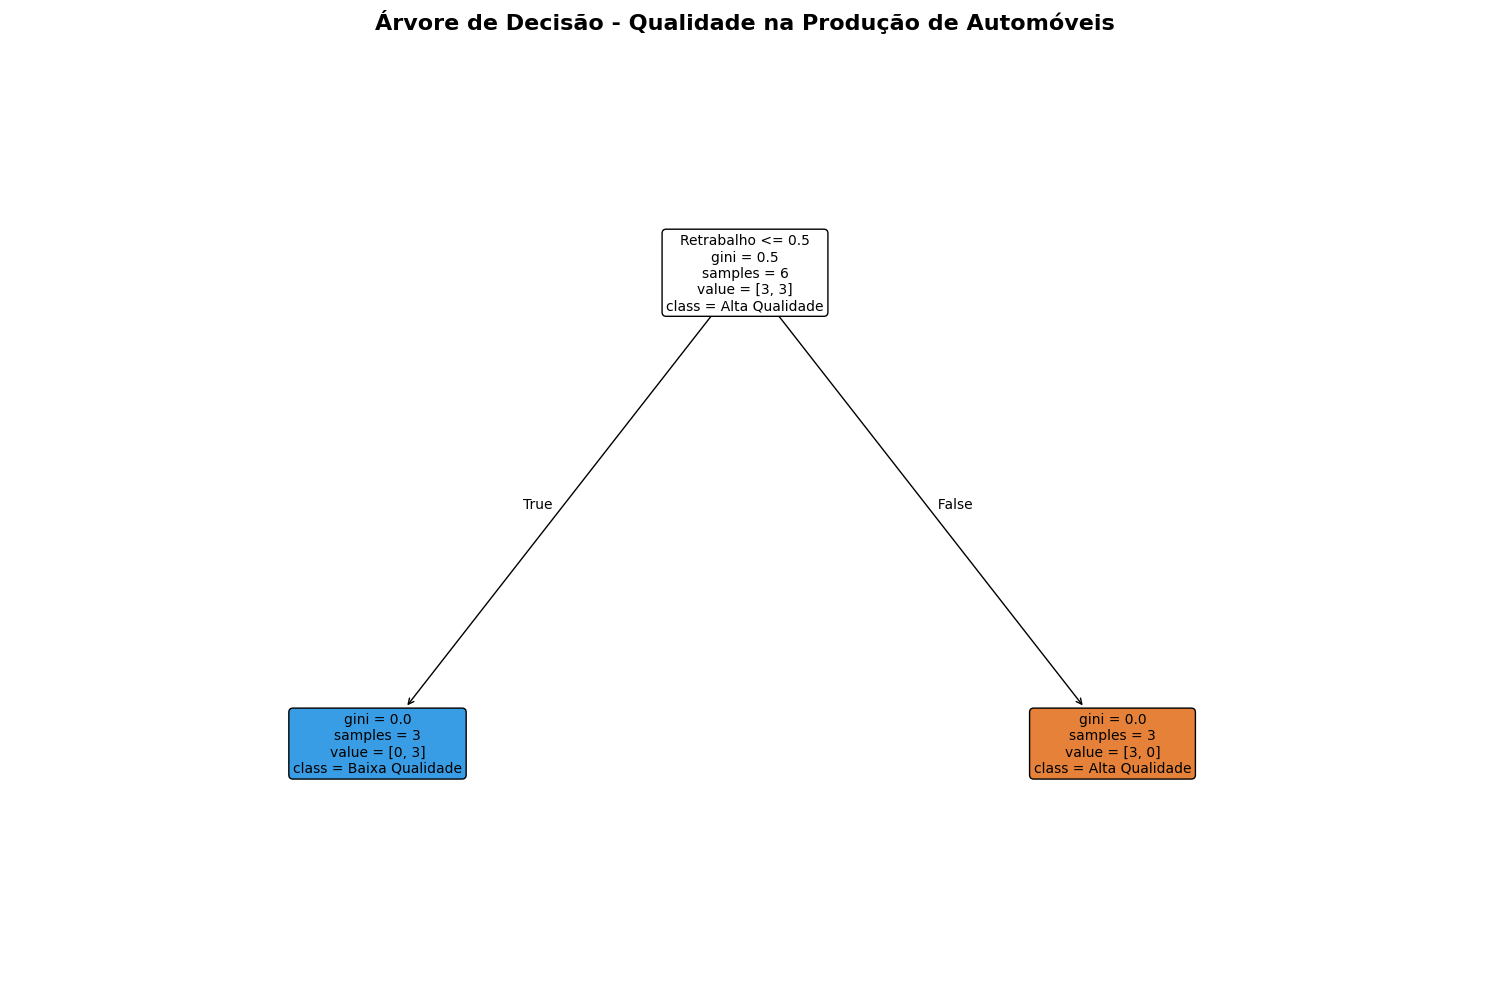

In [9]:
arvore = DecisionTreeClassifier(random_state=42, max_depth=3)
arvore.fit(X, y)

print(f"Acurácia: {arvore.score(X, y):.2%}\n")

# VISUALIZAÇÃO 1: ÁRVORE DE DECISÃO
plt.figure(figsize=(15, 10))
tree.plot_tree(arvore, 
               feature_names=['Precisão', 'Velocidade', 'Retrabalho'],
               class_names=['Alta Qualidade', 'Baixa Qualidade'],
               filled=True,
               rounded=True,
               fontsize=10)
plt.title('Árvore de Decisão - Qualidade na Produção de Automóveis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

C:\Users\dsadm\AppData\Local\Temp\ipykernel_45068\1501500923.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classificacao_counts.index, y=classificacao_counts.values, palette=['green', 'orange'])


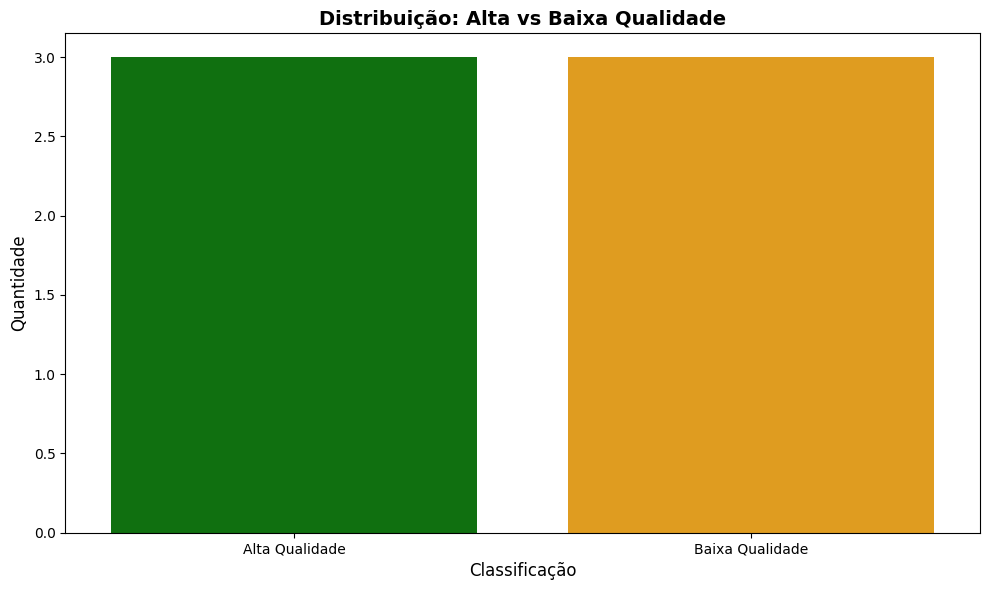

In [10]:
classificacao_counts = df['Classificação'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=classificacao_counts.index, y=classificacao_counts.values, palette=['green', 'orange'])
plt.title('Distribuição: Alta vs Baixa Qualidade', fontsize=14, fontweight='bold')
plt.xlabel('Classificação', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.tight_layout()
plt.show()